In [0]:

# Load data from DBFS
file_path = "/FileStore/tables/diabetic_data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Display first few rows
display(df.head(5))



encounter_id patient_nbr race gender age weight admission_type_id discharge_disposition_id admission_source_id time_in_hospital payer_code medical_specialty num_lab_procedures num_procedures num_medications number_outpatient number_emergency number_inpatient diag_1 diag_2 diag_3 number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted 2278392 8222157 Caucasian Female [0-10) ? 6 25 1 1 ? Pediatrics-Endocrinology 41 0 1 0 0 0 250.83 ? ? 1 None None No No No No No No No No No No No No No No No No No No No No No No No No No NO 149190 55629189 Caucasian Female [10-20) ? 1 1 7 3 ? ? 59 0 18 0 0 0 276 250.01 255 9 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes >30 64410 86047875 AfricanAmerican Female [20-30) ? 1 1 7 2 ? ? 11 5 13 2 0 1 648 250 V27 6 None None No No No No No No Steady No No No No No No No No No No No No No No No No No Yes NO 500364 82442376 Caucasian Male [30-40) ? 1 1 7 2 ? ? 44 1 16 0 0 0 8 250.43 403 7 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes NO 16680 42519267 Caucasian Male [40-50) ? 1 1 7 1 ? ? 51 0 8 0 0 0 197 157 250 5 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes NO

In [0]:
# Display schema
df.printSchema()

# Summary statistics
display(df.describe())

# Count rows
print(f"Total Records: {df.count()}")


root
 |-- encounter_id: integer (nullable = true)
 |-- patient_nbr: integer (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- admission_type_id: integer (nullable = true)
 |-- discharge_disposition_id: integer (nullable = true)
 |-- admission_source_id: integer (nullable = true)
 |-- time_in_hospital: integer (nullable = true)
 |-- payer_code: string (nullable = true)
 |-- medical_specialty: string (nullable = true)
 |-- num_lab_procedures: integer (nullable = true)
 |-- num_procedures: integer (nullable = true)
 |-- num_medications: integer (nullable = true)
 |-- number_outpatient: integer (nullable = true)
 |-- number_emergency: integer (nullable = true)
 |-- number_inpatient: integer (nullable = true)
 |-- diag_1: string (nullable = true)
 |-- diag_2: string (nullable = true)
 |-- diag_3: string (nullable = true)
 |-- number_diagnoses: integer (nullable = true)
 |-

summary encounter_id patient_nbr race gender age weight admission_type_id discharge_disposition_id admission_source_id time_in_hospital payer_code medical_specialty num_lab_procedures num_procedures num_medications number_outpatient number_emergency number_inpatient diag_1 diag_2 diag_3 number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted count 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 101766 mean 1.652016456229782E8 5.4330400694947235E7 null null null null 2.024006053102215 3.7156417664052825 5.754436648782501 4.395986871843248 null null 43.09564098028811 1.339730361810428 16.021844230882614 0.36935715268360747 0.19783621248747127 0.635565906098304 493.583070329668 438.6748831822878 418.1792854069314 7.422606764538254 null null null null null null null null null null null null null null null null null null null null null null null null null null null null stddev 1.026402959834576E8 3.869635934653421E7 null null null null 1.4454028297561219 5.280165509299267 4.064080834283899 2.9851077674712645 null null 19.67436224914214 1.7058069791211583 8.127566209167293 1.2672650965326786 0.9304722684224644 1.2628632900973231 206.71532043694612 178.90163753828597 177.32397864613483 1.9336001449974298 null null null null null null null null null null null null null null null null null null null null null null null null null null null null min 12522 135 ? Female [0-10) >200 1 1 1 1 ? ? 1 0 1 0 0 0 10 11 11 1 >200 >7 Down Down Down Down Down No Down Down No Down Down Down Down No No No No Down Down No No No No Ch No <30 max 443867222 189502619 Other Unknown/Invalid [90-100) [75-100) 8 28 25 14 WC Urology 132 6 81 42 76 21 V71 V86 V86 16 Norm Norm Up Up Up Up Up Steady Up Up Steady Up Up Up Up Steady Up No No Up Up Steady Steady Steady Steady No Yes NO

Total Records: 101766


In [0]:
from pyspark.sql.functions import col

# Drop duplicates
df = df.dropDuplicates()

# Drop columns with high missing value percentages or irrelevant for analysis
df = df.drop("weight", "payer_code")

# Fill missing values for categorical and numerical columns
# Replace '?' with None (null)
df = df.replace("?", None)

df = df.fillna({"race": "Unknown", "diag_1": "Missing"})

display(df.head(100))


encounter_id patient_nbr race gender age admission_type_id discharge_disposition_id admission_source_id time_in_hospital medical_specialty num_lab_procedures num_procedures num_medications number_outpatient number_emergency number_inpatient diag_1 diag_2 diag_3 number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted 358776 101002446 Caucasian Male [70-80) 1 6 7 7 null 47 2 22 0 0 0 998 41 414 8 None None No No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes NO 35754 82637451 Caucasian Male [50-60) 2 1 2 3 null 31 6 16 0 0 0 414 411 250 9 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 1195548 106343838 Caucasian Female [70-80) 1 3 7 5 Family/GeneralPractice 64 0 21 0 0 1 38 428 427 8 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 833424 74447460 Caucasian Female [50-60) 2 1 2 6 null 55 2 7 0 0 0 784 511 518 8 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 676416 71778564 Caucasian Male [70-80) 3 6 4 7 null 2 1 8 0 0 1 808 70 250.01 5 None None No No No No No No No No No No No No No No No No No Down No No No No No Ch Yes >30 1260216 92117574 Unknown Male [30-40) 2 6 4 6 null 72 2 16 0 0 1 556 285 250 5 None None No No No No No No No No Steady No No No No No No No No Steady No No No No No Ch Yes >30 383430 80588529 Caucasian Female [70-80) 1 2 7 1 Cardiology 28 0 15 0 0 0 414 411 250.01 4 None None Steady No No No No No No No No No No No No No No No No Down No No No No No Ch Yes >30 253380 56480238 AfricanAmerican Female [60-70) 1 1 7 6 null 87 0 18 0 0 0 584 496 250.42 9 None None No No No No No No No Up No No No Steady No No No No No Steady No No No No No Ch Yes NO 325848 63023292 Caucasian Female [60-70) 1 1 7 2 Cardiology 41 0 11 0 0 0 411 250.01 401 6 None None No No No No No No No No No No Steady No No No No No No Down No No No No No Ch Yes >30 449142 66274866 Caucasian Male [50-60) 1 1 7 3 Family/GeneralPractice 59 0 11 0 0 0 428 496 278 6 None None Steady No No No No No Steady No No No No No No No No No No Steady No No No No No Ch Yes >30 150006 22864131 Unknown Female [50-60) 2 1 4 2 null 66 1 19 0 0 0 410 427 428 7 None None No No No No No No No No No No No No No No No No No Down No No No No No Ch Yes NO 419304 99715041 Caucasian Male [40-50) 2 1 2 7 null 36 2 9 0 0 0 511 571 585 5 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 630342 93232917 AfricanAmerican Female [50-60) 3 6 2 9 null 37 2 19 0 0 1 250.7 440 403 4 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 1186980 91370916 AfricanAmerican Male [40-50) 2 1 2 4 null 27 0 12 0 0 1 996 250 401 5 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 73578 86328819 AfricanAmerican Male [60-70) 1 3 7 12 null 75 5 13 0 0 0 999 507 996 9 None None No No No No No No No No No No No No No No No No No Up No No No No No Ch Yes NO 1070256 23043240 Caucasian Female [50-60) 2 1 4 3 null 41 4 20 0 0 1 414 411 250 7 None None No No No No No No No No No No No No No No No No No Steady No No No No No No Yes >30 1077924 21820806 AfricanAmerican Male [50-60) 1 6 7 3 null 52 0 13 0 0 2 198 197 197 9 None None No No No No No No No No No No No No No No No No No No No No No No No No No NO 1119858 68661747 Caucasian Male [40-50) 1 1 7 3 Cardiology 39 0 13 0 0 0 414 411 428 7 None None Steady No No No No No No No No No No No No No No No No No No No No No No No Yes >30 2278392 8222157 Caucasian Female [0-10) 6 25 1 1 Pediatrics-Endocrinology 41 0 1 0 0 0 250.83 null null

In [0]:
# Count readmissions
readmission_count = df.groupBy("readmitted").count()
display(readmission_count)

# Analyze readmission trends by race
readmission_race = df.groupBy("race", "readmitted").count().orderBy("race")
display(readmission_race)

# Analyze average length of stay by admission type
avg_stay = df.groupBy("admission_type_id").avg("time_in_hospital").sort("admission_type_id")
display(avg_stay)


readmitted count >30 35545 NO 54864 <30 11357

race readmitted count AfricanAmerican NO 10421 AfricanAmerican >30 6634 AfricanAmerican <30 2155 Asian <30 65 Asian >30 161 Asian NO 415 Caucasian >30 27124 Caucasian <30 8592 Caucasian NO 40383 Hispanic >30 642 Hispanic <30 212 Hispanic NO 1183 Other >30 446 Other NO 915 Other <30 145 Unknown <30 188 Unknown >30 538 Unknown NO 1547

admission_type_id avg(time_in_hospital) 1 4.378273754398963 2 4.610714285714286 3 4.320472733054216 4 3.2 5 3.947126436781609 6 4.583065583065583 7 4.857142857142857 8 3.0625

<module 'matplotlib.pyplot' from '/databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py'>

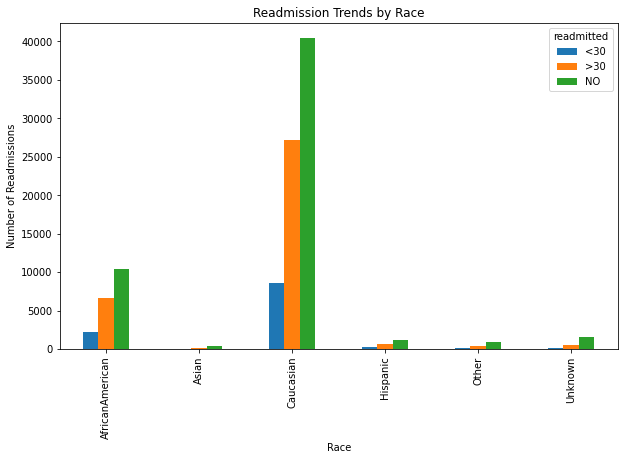

In [0]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas
readmission_race_pd = readmission_race.toPandas()

# Plot readmission trends by race
readmission_race_pd.pivot(index="race", columns="readmitted", values="count").plot(kind="bar", figsize=(10, 6))
plt.title("Readmission Trends by Race")
plt.xlabel("Race")
plt.ylabel("Number of Readmissions")
display(plt)


In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression

# Convert categorical variables to numerical using StringIndexer
indexer = StringIndexer(inputCols=["race", "admission_type_id", "discharge_disposition_id", "readmitted"],
                        outputCols=["race_index", "admission_type_index", "discharge_disposition_index", "readmitted_index"])
df = indexer.fit(df).transform(df)

# Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=["race_index", "admission_type_index", "discharge_disposition_index", "time_in_hospital"],
    outputCol="features")
df = assembler.transform(df)

# Train-test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="readmitted_index")
lr_model = lr.fit(train_df)

# Evaluate the model
predictions = lr_model.transform(test_df)

# Display predictions
display(predictions.select("readmitted", "readmitted_index", "prediction", "probability"))


readmitted readmitted_index prediction probability >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5109973676503874, 0.36211258573233035, 0.12689004661728226)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6581476786422035, 0.2138927656089823, 0.12795955574881426)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.47552866675254524, 0.40763810959986213, 0.11683322364759255)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5299858852410481, 0.36810997398930284, 0.10190414076964902)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6325219270922967, 0.2451165298881009, 0.12236154301960236)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6325219270922967, 0.2451165298881009, 0.12236154301960236)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6074122579119565, 0.2643608165195105, 0.12822692556853285)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5577964045089991, 0.2884127967651642, 0.15379079872583662)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.4913338663664281, 0.391696965989981, 0.11696916764359082)) <30 2.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5379009664418472, 0.3602909238420245, 0.10180810971612843)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5476391973117164, 0.2930882428701976, 0.1592725598180861)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6325219270922967, 0.2451165298881009, 0.12236154301960236)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5667240460559918, 0.3386127809961931, 0.09466317294781511)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5976691864808755, 0.26923992136254277, 0.1330908921565817)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6512240801027243, 0.23555772543981415, 0.11321819445746152)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5474805649760547, 0.3542865355021743, 0.09823289952177097)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6229868855101084, 0.24988545340935364, 0.12712766108053802)) <30 2.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.458013264555107, 0.39905077349306306, 0.14293596195183006)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5207457442082408, 0.3613855033822337, 0.11786875240952546)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.45442635255181896, 0.41657621527261, 0.12899743217557105)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6189223734745264, 0.2592537269424736, 0.12182389958299987)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5554752725325937, 0.34289745850819103, 0.10162726895921527)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5441839939658762, 0.3490358255255232, 0.1067801805086006)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.4602871976926722, 0.40616298812655943, 0.1335498141807684)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5493615129481034, 0.35230375945885073, 0.09833472759304587)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5480030831704903, 0.3460666299308995, 0.1059302868986101)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.47552866675254524, 0.40763810959986213, 0.11683322364759255)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5332035839477586, 0.37170704838409957, 0.09508936766814198)) <30 2.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.6098448505008838, 0.2816699576091478, 0.10848519188996839)) NO 0.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5858996543415224, 0.31972499770773666, 0.09437534795074083)) >30 1.0 0.0 Map(vectorType -> dense, length -> 3, values -> List(0.5521913707836791, 0.359308291225548, 0.08850033799077299)) NO 0.0 0.0 Map(vectorT